# ***E-COMMERCE SALES ANALYSIS - DATA ANALYSIS PROJECT***

---------------------------------------------------

## **Introduction**

This project transforms a raw transactional dataset into actionable business strategy. By examining 1,000 sales records, we identify which products drive profit, how customers behave across different regions, and where the business can optimize its operations to reduce losses.The data represents a multi-category retail environment, capturing the full lifecycle of an order—from the moment a customer in a specific region selects a product to the final delivery and potential return.The dataset is structured with 17 distinct columns, providing a multidimensional view of every sale.The analysis is carried out using python and data analytics libraries such as Numpy, Pandas, Matplotlib, Plotly and Seaborn.The project includes data cleaning, transformation, feature engineering, exploratory data analysis and visualization to understand meaningful informations.The finding from this analysis can help to identify which products drive profit, how customers behave across different regions, and where the business can optimize its operations to reduce losses.This report provides a strategic roadmap for operational improvement.

## **Attribute Details**

The foundation of this analysis is a robust dataset consisting of 1,000 unique transaction records and across 17 detailed columns:


order_id: A unique alphanumeric string for each transaction.

customer_id: A unique identifier for each shopper, essential for analyzing customer loyalty.

product_id: A unique code for each product in the catalog.

category: The department the product belongs to (e.g., Electronics, Home, Fashion).

price: The original cost of a single unit before any adjustments.

discount: The promotional reduction applied (often a decimal between 0 and 1).

total_amount: The final revenue per order (Price × Quantity − Discount).

profit_margin: The net profit percentage, used to identify high-value categories.

quantity: The number of units purchased in the order.

payment_method: The checkout method used (e.g., Credit Card, UPI, PayPal).

order_date: The date of purchase (Target for Pandas to_datetime transformation).

delivery_time_days: Time taken from order to delivery.

region: The geographic location of the buyer (North, South, East, West, Central).

returned: A binary flag (Yes/No) indicating if the item was sent back.

shipping_cost: The business expense required to deliver the order.

customer_age: The age of the shopper.

customer_gender: The gender identity of the customer.

## **Imported Libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset and display the first 5 rows

df = pd.read_csv('E-Commerce Sales.csv')
df.head()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,23-12-2023,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,03-04-2025,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,08-10-2024,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,14-09-2024,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,21-12-2024,6,East,No,13.88,2.74,1.15,39,Male


In [8]:
# Display last 5 rows of the dataset

df.tail()

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
995,O100995,C17409,P235391,Fashion,81.25,0.00,4,Wallet,09-01-2025,6,East,Yes,325.00,9.76,103.99,25,Female
996,O100996,C17418,P231734,Home,20.18,0.05,1,Debit Card,28-06-2024,4,South,No,19.17,6.19,-0.82,44,Female
997,O100997,C14972,P213350,Grocery,13.52,0.00,1,PayPal,30-12-2023,7,East,No,13.52,2.45,-1.37,49,Female
998,O100998,C15124,P249281,Toys,69.31,0.05,1,COD,14-02-2025,3,North,No,65.84,6.57,19.77,62,Male
999,O100999,C17286,P214450,Toys,32.25,0.10,2,Credit Card,14-08-2024,7,East,No,58.05,7.96,15.26,40,Female


In [9]:
# Number of rows and columns in the dataset

df.shape

(1000, 17)

In [10]:
# Column names in the dataset

df.columns

Index(['order_id', 'customer_id', 'product_id', 'category', 'price',
       'discount', 'quantity', 'payment_method', 'order_date',
       'delivery_time_days', 'region', 'returned', 'total_amount',
       'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender'],
      dtype='object')

In [11]:
# Display summary statistics for numerical and categorical columns

df.describe(include='all')

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
count,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,1000,937,993,7,NaN,NaN,NaN,6,555,NaN,5,2,NaN,NaN,NaN,NaN,3
top,O100000,C11243,P237976,Fashion,NaN,NaN,NaN,Credit Card,13-11-2024,NaN,South,No,NaN,NaN,NaN,NaN,Female
freq,1,3,2,188,NaN,NaN,NaN,346,6,NaN,244,961,NaN,NaN,NaN,NaN,503
mean,NaN,NaN,NaN,NaN,117.85307,0.048450,1.539000,NaN,NaN,4.818000,NaN,NaN,180.006850,6.141880,29.265340,43.752000,NaN
std,NaN,NaN,NaN,NaN,194.12643,0.069317,0.968203,NaN,NaN,1.261137,NaN,NaN,417.034849,2.377408,57.103728,14.957146,NaN
min,NaN,NaN,NaN,NaN,1.02000,0.000000,1.000000,NaN,NaN,3.000000,NaN,NaN,0.940000,0.290000,-5.560000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,16.31500,0.000000,1.000000,NaN,NaN,4.000000,NaN,NaN,19.972500,4.347500,1.290000,31.000000,NaN
50%,NaN,NaN,NaN,NaN,42.81500,0.000000,1.000000,NaN,NaN,5.000000,NaN,NaN,55.910000,6.190000,10.150000,43.000000,NaN
75%,NaN,NaN,NaN,NaN,135.05250,0.100000,2.000000,NaN,NaN,6.000000,NaN,NaN,166.975000,7.902500,35.125000,57.000000,NaN


In [12]:
# Unique categories in the 'Category' column

df['category'].unique()

array(['Home', 'Grocery', 'Electronics', 'Beauty', 'Fashion', 'Toys',
       'Sports'], dtype=object)

In [13]:
# Unique categories in the 'Region' column

df['region'].unique()

array(['West', 'South', 'North', 'East', 'Central'], dtype=object)

In [14]:
# Unique count of values in each column

df.nunique()

order_id              1000
customer_id            937
product_id             993
category                 7
price                  962
discount                 6
quantity                 5
payment_method           6
order_date             555
delivery_time_days       8
region                   5
returned                 2
total_amount           962
shipping_cost          595
profit_margin          899
customer_age            52
customer_gender          3
dtype: int64

In [15]:
# Display summary information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            1000 non-null   object 
 1   customer_id         1000 non-null   object 
 2   product_id          1000 non-null   object 
 3   category            1000 non-null   object 
 4   price               1000 non-null   float64
 5   discount            1000 non-null   float64
 6   quantity            1000 non-null   int64  
 7   payment_method      1000 non-null   object 
 8   order_date          1000 non-null   object 
 9   delivery_time_days  1000 non-null   int64  
 10  region              1000 non-null   object 
 11  returned            1000 non-null   object 
 12  total_amount        1000 non-null   float64
 13  shipping_cost       1000 non-null   float64
 14  profit_margin       1000 non-null   float64
 15  customer_age        1000 non-null   int64  
 16  custome

In [16]:
# Data types of each column

df.dtypes

order_id               object
customer_id            object
product_id             object
category               object
price                 float64
discount              float64
quantity                int64
payment_method         object
order_date             object
delivery_time_days      int64
region                 object
returned               object
total_amount          float64
shipping_cost         float64
profit_margin         float64
customer_age            int64
customer_gender        object
dtype: object

## **Clean Dataset**

In [17]:
# Clean column names by converting to title case and replacing spaces with underscores

df.columns = (df.columns.str).title().str.replace(' ', '_')
df.columns

Index(['Order_Id', 'Customer_Id', 'Product_Id', 'Category', 'Price',
       'Discount', 'Quantity', 'Payment_Method', 'Order_Date',
       'Delivery_Time_Days', 'Region', 'Returned', 'Total_Amount',
       'Shipping_Cost', 'Profit_Margin', 'Customer_Age', 'Customer_Gender'],
      dtype='object')

In [18]:
# Check for missing values in each column

df.isnull().sum()

Order_Id              0
Customer_Id           0
Product_Id            0
Category              0
Price                 0
Discount              0
Quantity              0
Payment_Method        0
Order_Date            0
Delivery_Time_Days    0
Region                0
Returned              0
Total_Amount          0
Shipping_Cost         0
Profit_Margin         0
Customer_Age          0
Customer_Gender       0
dtype: int64

In [19]:
# Convert 'Order_Date' column to datetime format and check data types again

df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')
df.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5016\1703174116.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')


Order_Id                      object
Customer_Id                   object
Product_Id                    object
Category                      object
Price                        float64
Discount                     float64
Quantity                       int64
Payment_Method                object
Order_Date            datetime64[ns]
Delivery_Time_Days             int64
Region                        object
Returned                      object
Total_Amount                 float64
Shipping_Cost                float64
Profit_Margin                float64
Customer_Age                   int64
Customer_Gender               object
dtype: object

## **Feature Engineering**

In [20]:
# Extract year, month, day, and weekday from 'Order_Date' column and create new columns for each

df["Order_Year"] = df["Order_Date"].dt.year
df["Order_Month"] = df["Order_Date"].dt.month
df["Order_Day"] = df["Order_Date"].dt.day
df["Order_Weekday"] = df["Order_Date"].dt.day_name()
df.head()

,Order_Id,Customer_Id,Product_Id,Category,Price,Discount,Quantity,Payment_Method,Order_Date,Delivery_Time_Days,...,Returned,Total_Amount,Shipping_Cost,Profit_Margin,Customer_Age,Customer_Gender,Order_Year,Order_Month,Order_Day,Order_Weekday
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,...,No,139.47,7.88,31.17,60,Female,2023,12,23,Saturday
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,...,No,24.73,4.60,-2.62,37,Male,2025,4,3,Thursday
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,...,No,166.80,6.58,13.44,34,Male,2024,10,8,Tuesday
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,...,No,63.67,5.50,2.14,21,Female,2024,9,14,Saturday
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,...,No,13.88,2.74,1.15,39,Male,2024,12,21,Saturday


In [21]:
# Create a new column 'Age_Group' by categorizing 'Customer_Age' into age groups

df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Teen', 'Young Adult', 'Adult', 'Middle Aged', 'Senior'])
df.head()

,Order_Id,Customer_Id,Product_Id,Category,Price,Discount,Quantity,Payment_Method,Order_Date,Delivery_Time_Days,...,Total_Amount,Shipping_Cost,Profit_Margin,Customer_Age,Customer_Gender,Order_Year,Order_Month,Order_Day,Order_Weekday,Age_Group
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,...,139.47,7.88,31.17,60,Female,2023,12,23,Saturday,Middle Aged
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,...,24.73,4.60,-2.62,37,Male,2025,4,3,Thursday,Adult
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,...,166.80,6.58,13.44,34,Male,2024,10,8,Tuesday,Young Adult
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,...,63.67,5.50,2.14,21,Female,2024,9,14,Saturday,Young Adult
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,...,13.88,2.74,1.15,39,Male,2024,12,21,Saturday,Adult


In [22]:
# Generate random customer names and product names based on the 'Category' column

first_names = ["James", "Mary", "Robert", "Patricia", "John", "Jennifer", "Michael", ...] 
last_names = ["Smith", "Johnson", "Williams", "Brown", "Jones", "Garcia", "Miller", ...]


product_logic = {
    'Home': {'pre': ['Comfort', 'Elite', 'Sleek'], 'suf': ['Lamp', 'Office Chair', 'Blender']},
    'Grocery': {'pre': ['Organic', 'Fresh', 'Gourmet'], 'suf': ['Almonds', 'Olive Oil', 'Honey']},
    'Electronics': {'pre': ['Smart', 'Ultra', 'Wireless'], 'suf': ['Headphones', 'Monitor', 'Mouse']},
    'Fashion': {'pre': ['Classic', 'Trendy', 'Urban'], 'suf': ['T-shirt', 'Sneakers', 'Scarf']},
    'Beauty': {'pre': ['Radiant', 'Soothing', 'Natural'], 'suf': ['Face Serum', 'Moisturizer', 'Cleanser']}
}
import random

df['Customer_Name'] = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(len(df))]

def get_prod(cat):
    data = product_logic.get(cat, {'pre': ['Generic'], 'suf': ['Item']})
    return f"{random.choice(data['pre'])} {random.choice(data['suf'])}"

df['Product_Name'] = df['Category'].apply(get_prod)

In [23]:
# Reorder columns for better readability

new_order = ['Order_Id', 'Customer_Name', 'Product_Name', 'Category', 'Price', 'Quantity', 'Discount', 'Total_Amount', 'Shipping_Cost', 'Profit_Margin', 'Order_Date', 'Order_Year', 'Order_Month', 'Order_Day', 'Order_Weekday', 'Customer_Age', 'Age_Group', 'Region', 'Delivery_Time_Days']

df = df[new_order + [c for c in df.columns if c not in new_order]]

In [24]:
# Drop 'Customer_Id' and 'Product_Id' columns as they are no longer needed

df.drop(columns=['Customer_Id', 'Product_Id'], inplace=True)

In [25]:
df.columns

Index(['Order_Id', 'Customer_Name', 'Product_Name', 'Category', 'Price',
       'Quantity', 'Discount', 'Total_Amount', 'Shipping_Cost',
       'Profit_Margin', 'Order_Date', 'Order_Year', 'Order_Month', 'Order_Day',
       'Order_Weekday', 'Customer_Age', 'Age_Group', 'Region',
       'Delivery_Time_Days', 'Payment_Method', 'Returned', 'Customer_Gender'],
      dtype='object')

In [26]:
df.head()

,Order_Id,Customer_Name,Product_Name,Category,Price,Quantity,Discount,Total_Amount,Shipping_Cost,Profit_Margin,...,Order_Month,Order_Day,Order_Weekday,Customer_Age,Age_Group,Region,Delivery_Time_Days,Payment_Method,Returned,Customer_Gender
0,O100000,James Jones,Sleek Office Chair,Home,164.08,1,0.15,139.47,7.88,31.17,...,12,23,Saturday,60,Middle Aged,West,4,Credit Card,No,Female
1,O100001,Ellipsis Smith,Fresh Almonds,Grocery,24.73,1,0.00,24.73,4.60,-2.62,...,4,3,Thursday,37,Adult,South,6,Credit Card,No,Male
2,O100002,John Williams,Wireless Headphones,Electronics,175.58,1,0.05,166.80,6.58,13.44,...,10,8,Tuesday,34,Young Adult,North,4,Credit Card,No,Male
3,O100003,Ellipsis Brown,Wireless Mouse,Electronics,63.67,1,0.00,63.67,5.50,2.14,...,9,14,Saturday,21,Young Adult,South,6,UPI,No,Female
4,O100004,John Miller,Comfort Office Chair,Home,16.33,1,0.15,13.88,2.74,1.15,...,12,21,Saturday,39,Adult,East,6,COD,No,Male


In [27]:
# Check and remove duplicate rows from the dataset

df.drop_duplicates(inplace=True)

In [28]:
# Saving Cleaned Data

df.to_csv("E-Commerce Sales_Cleaned.csv",index=False)

## **Exploratory Data Analysis (EDA) And Data Visualization**

#### **Univariate Analysis** - This focuses on understanding the distribution and frequency of individual variables.

In [29]:
# Display summary statistics for numerical columns

df.describe()

,Price,Quantity,Discount,Total_Amount,Shipping_Cost,Profit_Margin,Order_Date,Order_Year,Order_Month,Order_Day,Customer_Age,Delivery_Time_Days
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,117.85307,1.539000,0.048450,180.006850,6.141880,29.265340,2024-09-15 03:07:12.000000256,2024.210000,6.481000,15.785000,43.752000,4.818000
min,1.02000,1.000000,0.000000,0.940000,0.290000,-5.560000,2023-09-12 00:00:00,2023.000000,1.000000,1.000000,18.000000,3.000000
25%,16.31500,1.000000,0.000000,19.972500,4.347500,1.290000,2024-03-09 00:00:00,2024.000000,3.000000,9.000000,31.000000,4.000000
50%,42.81500,1.000000,0.000000,55.910000,6.190000,10.150000,2024-09-16 00:00:00,2024.000000,6.000000,16.000000,43.000000,5.000000
75%,135.05250,2.000000,0.100000,166.975000,7.902500,35.125000,2025-03-18 06:00:00,2025.000000,10.000000,23.000000,57.000000,6.000000
max,1663.80000,5.000000,0.300000,4857.840000,12.860000,570.080000,2025-09-11 00:00:00,2025.000000,12.000000,31.000000,69.000000,10.000000
std,194.12643,0.968203,0.069317,417.034849,2.377408,57.103728,NaN,0.695977,3.498554,8.475766,14.957146,1.261137


In [30]:
# Statistical Summary of Total Amount

df['Total_Amount'].describe()

count    1000.000000
mean      180.006850
std       417.034849
min         0.940000
25%        19.972500
50%        55.910000
75%       166.975000
max      4857.840000
Name: Total_Amount, dtype: float64

The average transaction is $180.01, with a wide variation (standard deviation of $417.03). Values range from a minimum of $0.94 to a maximum of $4,857.84.

In [31]:
# Frequency of Categories

df['Category'].value_counts()

Category
Fashion        188
Home           178
Electronics    176
Grocery        135
Toys           118
Beauty         117
Sports          88
Name: count, dtype: int64

Fashion is the most frequent category (188 orders), followed by Home (178) and Electronics (176).

In [32]:
# Frequency of Customer Regions

df['Region'].value_counts()

Region
South      244
North      226
West       199
East       190
Central    141
Name: count, dtype: int64

The South region leads with 244 orders, followed by the North (226) and West (199).

#### **Bivariate Analysis** - This examines the relationship between two variables to identify trends and differences.

In [33]:
# Total and Average Revenue by Category

df.groupby('Category')['Total_Amount'].agg(['sum', 'mean'])

,sum,mean
Category,,
Beauty,4802.48,41.046838
Electronics,106696.54,606.230341
Fashion,16331.37,86.868989
Grocery,2702.14,20.015852
Home,34916.03,196.157472
Sports,10894.91,123.805795
Toys,3663.38,31.045593


Electronics generates the highest total revenue ($106,696.54) and has the highest average order value ($606.23). Grocery has the lowest average spend at $20.02.

In [34]:
# Average Spending by Gender

df.groupby('Customer_Gender')['Total_Amount'].mean()

Customer_Gender
Female    193.994056
Male      172.942972
Other      75.031389
Name: Total_Amount, dtype: float64

Female customers spend more on average ($193.99) compared to Male customers ($172.94).

In [35]:
# Average Spending by Age Group

df.groupby('Age_Group')['Total_Amount'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5016\1792864206.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age_Group')['Total_Amount'].mean()


Age_Group
Teen            71.408235
Young Adult    174.697656
Adult          181.405245
Middle Aged    187.086494
Senior         193.987246
Name: Total_Amount, dtype: float64

Seniors have the highest average order value ($193.99), while Teens spend significantly less on average ($71.41).

#### **Multivariate Analysis** - This analyzes the interaction between three or more variables to find complex patterns.

In [36]:
# Average Total Amount by Category and Region

df.groupby(['Category','Region'])['Total_Amount'].mean()

Category     Region 
Beauty       Central     37.054286
             East        47.630000
             North       44.728667
             South       42.635897
             West        32.159091
Electronics  Central    546.513333
             East       536.764865
             North      812.100000
             South      534.726136
             West       588.751622
Fashion      Central    142.938095
             East       107.230000
             North       66.885581
             South       69.376875
             West        83.370000
Grocery      Central     15.053333
             East        17.659355
             North       32.195714
             South       18.505152
             West        14.803684
Home         Central    230.799000
             East       168.891220
             North      239.382128
             South      125.572308
             West       192.696471
Sports       Central    119.684375
             East       152.689333
             North       89.949375

In the North region, Electronics reaches its highest average spend ($812.10). Fashion is notably popular in the Central region ($142.94 average).

In [37]:
# Average Spending by Gender and Age Group

df.groupby(['Customer_Gender','Age_Group'])['Total_Amount'].mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5016\208180183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Customer_Gender','Age_Group'])['Total_Amount'].mean()


Customer_Gender  Age_Group  
Female           Teen            62.365556
                 Young Adult    185.331091
                 Adult          199.012143
                 Middle Aged    191.199404
                 Senior         255.402105
Male             Teen           102.535000
                 Young Adult    170.911408
                 Adult          169.295328
                 Middle Aged    190.871622
                 Senior         121.415000
Other            Teen            18.720000
                 Young Adult     81.092308
                 Adult           91.860000
                 Middle Aged     55.836667
                 Senior          93.406667
Name: Total_Amount, dtype: float64

Senior Females are the highest spending segment with an average of $255.40, while Male Seniors spend much less ($121.41).

In [38]:
# Total Quantity sold by Category and Payment Method

df.groupby(['Category','Payment_Method'])['Quantity'].sum()

Category     Payment_Method
Beauty       COD               22
             Credit Card       74
             Debit Card        58
             PayPal            19
             UPI               22
             Wallet             5
Electronics  COD               25
             Credit Card       97
             Debit Card        61
             PayPal            36
             UPI               37
             Wallet            22
Fashion      COD               52
             Credit Card       92
             Debit Card        54
             PayPal            36
             UPI               48
             Wallet            22
Grocery      COD               40
             Credit Card       67
             Debit Card        36
             PayPal            24
             UPI               19
             Wallet             7
Home         COD               41
             Credit Card       96
             Debit Card        45
             PayPal            22
             UPI    

Credit Cards are the most common payment method for large quantity purchases across all categories, especially in Electronics (97 items) and Home (96 items).

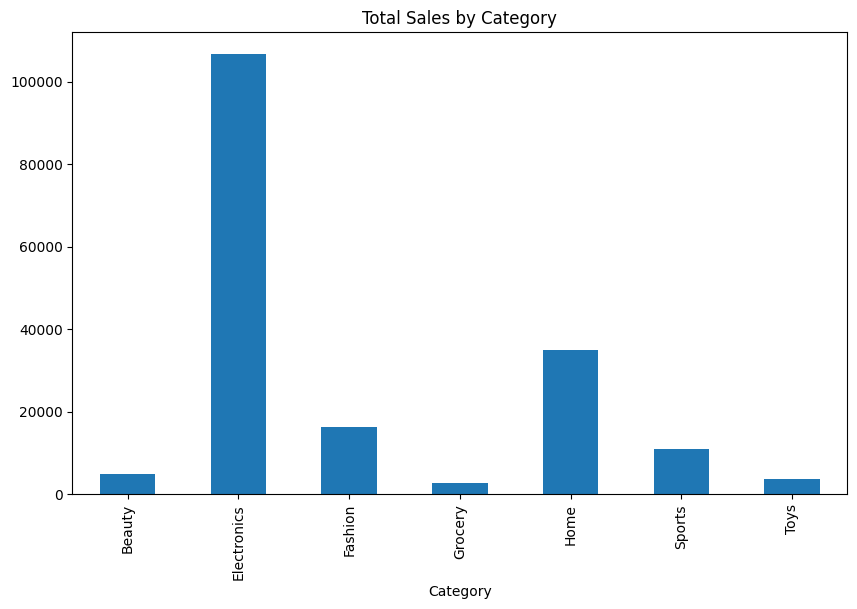

In [47]:
# Total Sales by Category - Shows which product lines generate the most revenue

plt.figure(figsize=(10,6))
df.groupby('Category')['Total_Amount'].sum().plot(kind='bar')
plt.xlabel=('Category')
plt.ylabel=('Total_Amount')
plt.title('Total Sales by Category')
plt.show()

**Insight** : Electronics by far leads revenue (Above 1 lakh), with Home and Fashion as distant runners-up and Grocery/Toys contributing very little.

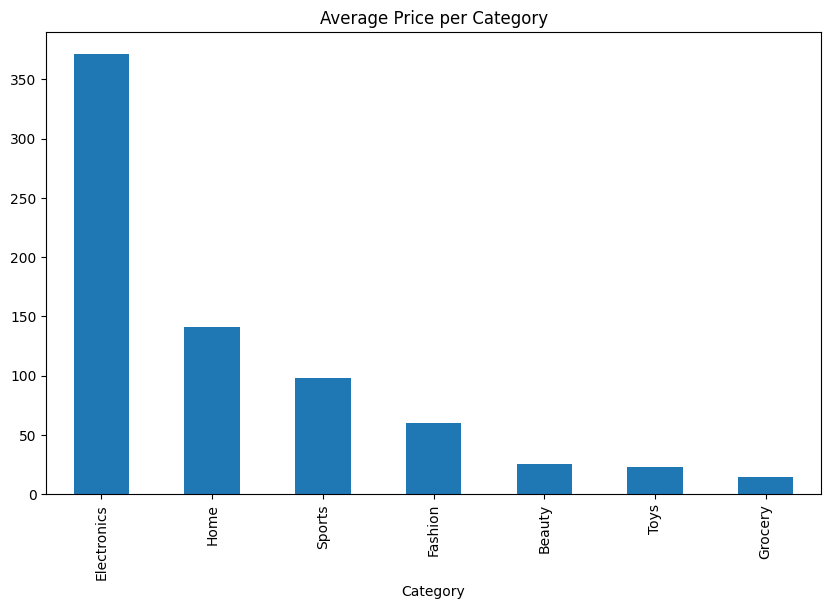

In [ ]:
# Average Price by Category - Compares the value density of products across different segments

plt.figure(figsize=(10, 6))
df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel=('Category')
plt.ylabel=('Price')
plt.title('Average Price per Category')
plt.show()

**Insight** : Electronics has the highest average price by a large margin, followed by Home and Sports; Grocery and Beauty are the lowest.

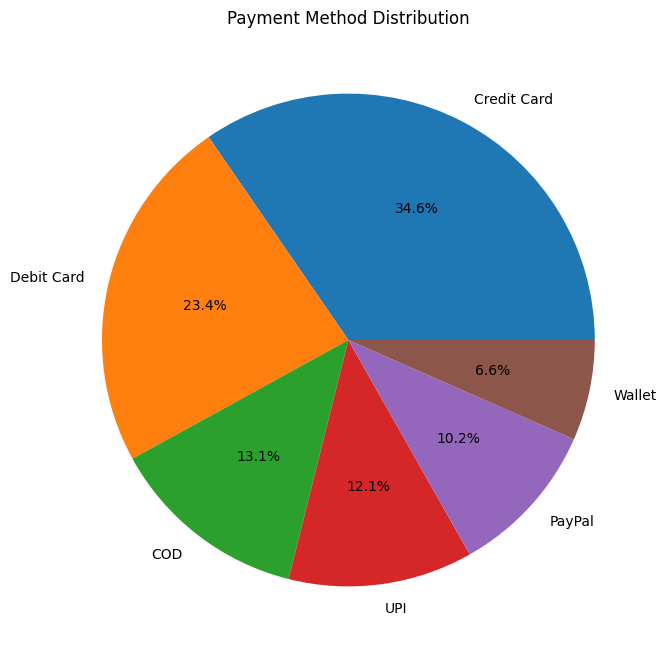

In [59]:
# Payment Method Distribution - Visualizes the popularity of different payment options among customers

plt.figure(figsize=(8, 8))
pay_counts = df['Payment_Method'].value_counts()
plt.pie(pay_counts, labels=pay_counts.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()

**Insight** : Credit Card is the most used payment method (35%), followed by Debit Card; Wallets are the least used.

<Figure size 1200x600 with 0 Axes>

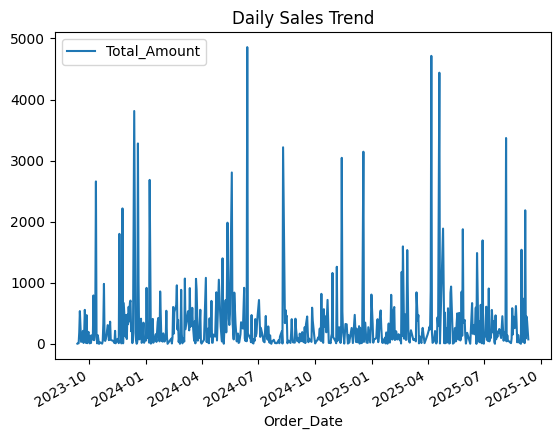

In [70]:
# Daily Sales Trend - Tracks revenue performance over the timeline of the dataset

plt.figure(figsize=(12, 6))
df.groupby('Order_Date')['Total_Amount'].sum().reset_index().plot(kind='line', x='Order_Date', y='Total_Amount')
plt.title('Daily Sales Trend')
plt.show()

**Insight** : Daily sales stay low most days but show occasional large spikes, likely from big orders or promotions

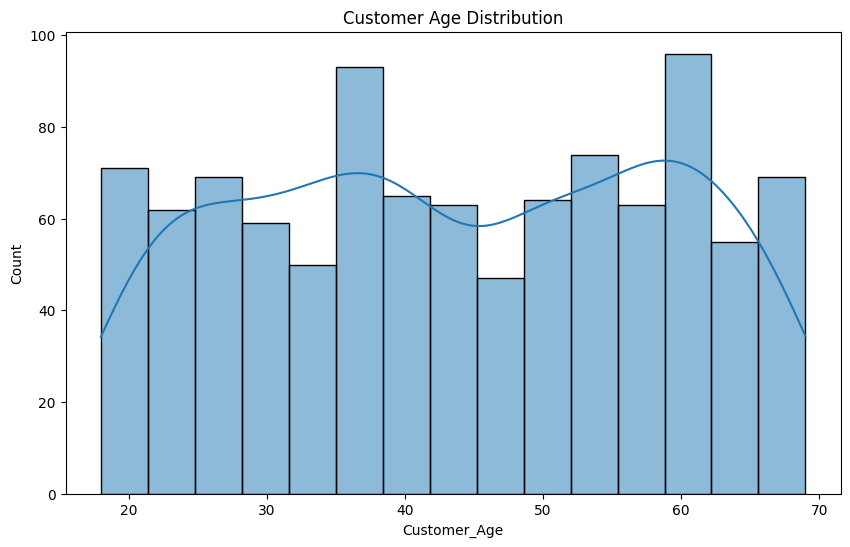

In [84]:
# Customer Age Distribution - Visualizes the dominant age groups of your shopping base

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=15, kde=True)
plt.title('Customer Age Distribution')
plt.show()

**Insight** : Most customers are adults aged 30–60 with peaks in the mid-30s and late-50s — target marketing to the 30–60 age group.

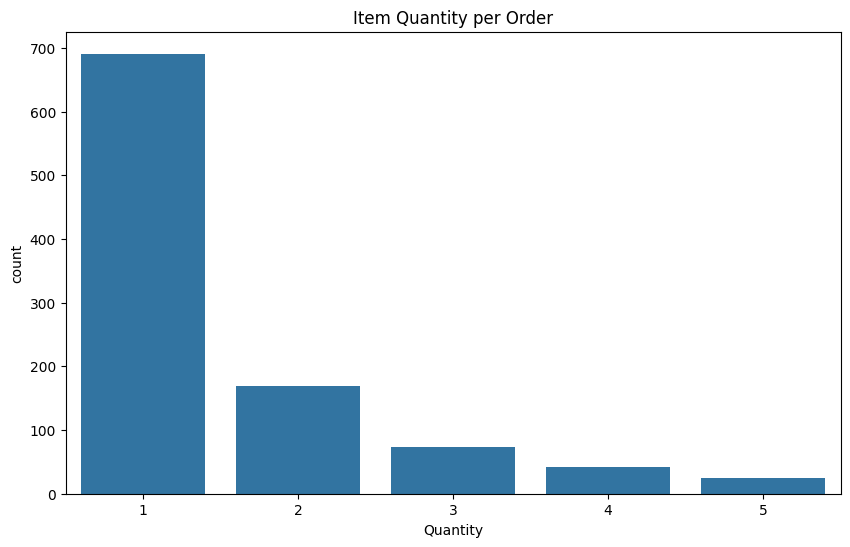

In [83]:
# Quantity Count - Identifies if customers typically buy single items or in bulk

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Quantity')
plt.title('Item Quantity per Order')
plt.show()

**Insight** : Most orders are single-item purchases by a large margin — implement subtle bundle/upsell offers at checkout to increase average order value.



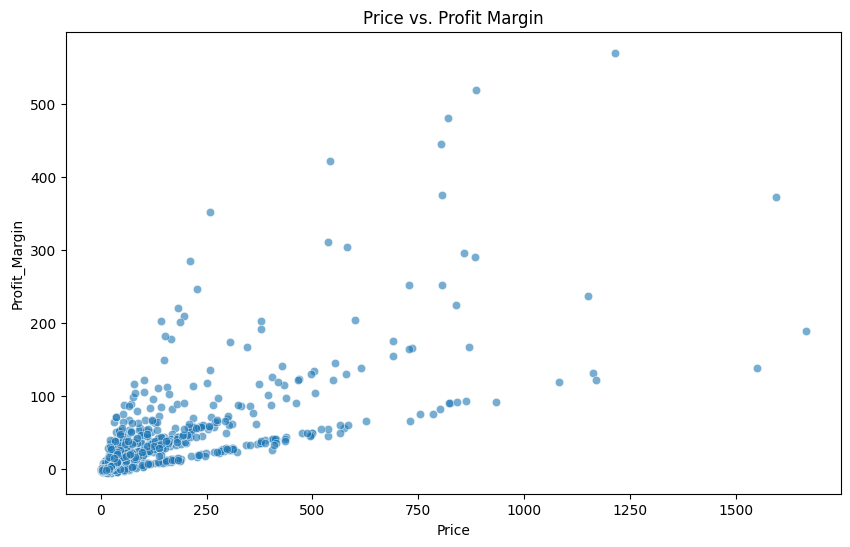

In [76]:
# Price vs. Profit Margin - Displays whether higher-priced items actually yield higher margins

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Profit_Margin', alpha=0.6)
plt.title('Price vs. Profit Margin')
plt.show()

**Insight** : Price and profit margin trend upward together, but with substantial scatter — some mid/high-priced items deliver especially high margins.

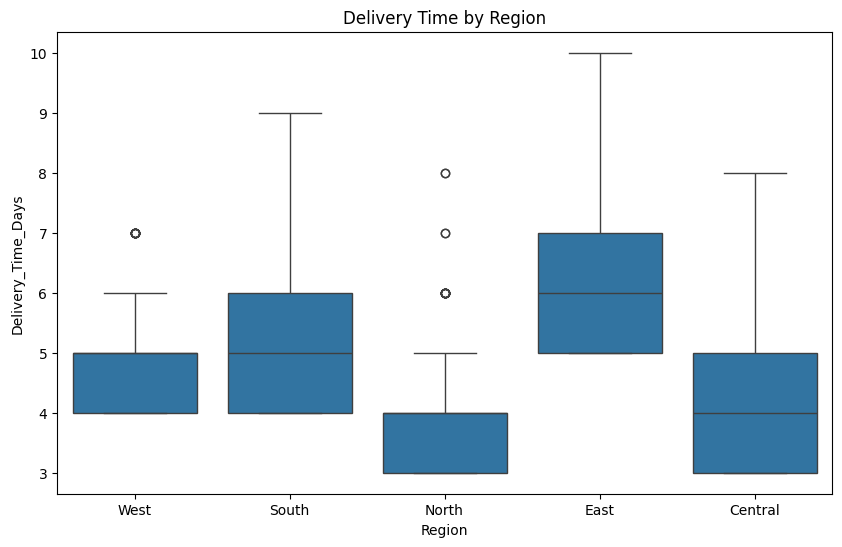

In [82]:
# Delivery Time by Region - Compares shipping efficiency across different geographical areas

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Delivery_Time_Days')
plt.title('Delivery Time by Region')
plt.show()

**Insight** : Delivery times vary by region — East shows the longest and most variable deliveries, North is the fastest and most consistent.

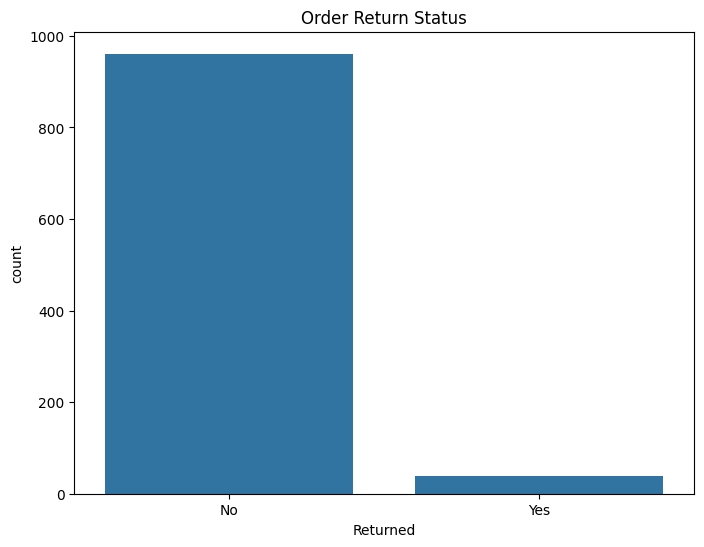

In [80]:
# Return Status - A simple "Yes/No" view of the return frequency

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Returned')
plt.title('Order Return Status')
plt.show()

**Insight** : Returns are very rare (most orders are not returned).

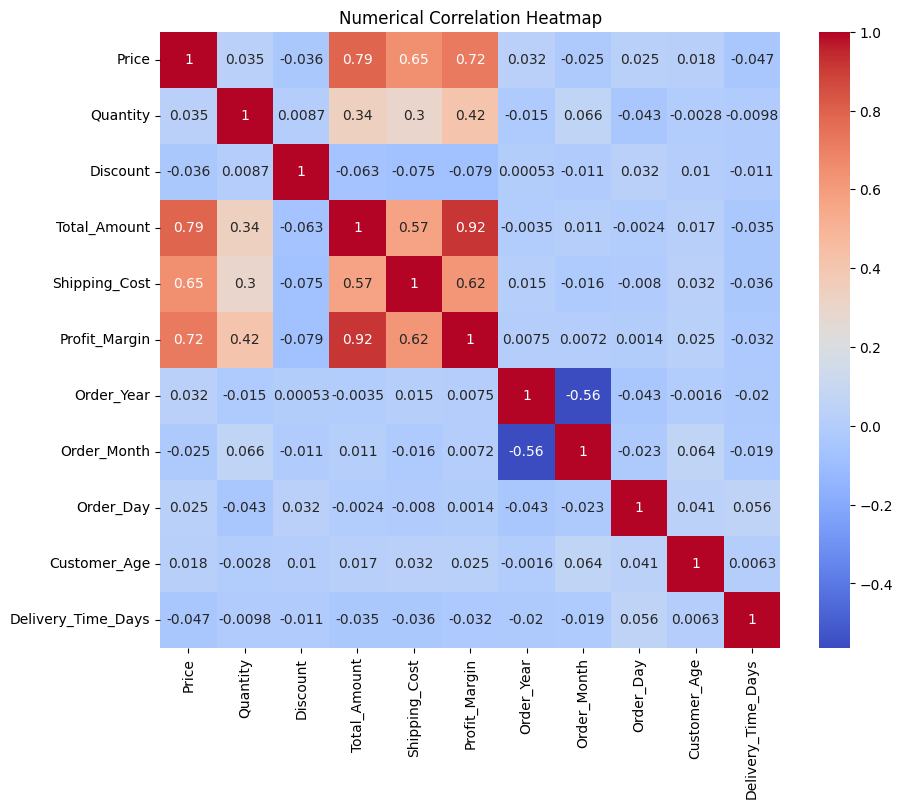

In [81]:
# Correlation Heatmap - A statistical summary showing how metrics like discount, price, and profit are linked

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Numerical Correlation Heatmap')
plt.show()

**Insight** - Higher prices strongly associate with larger total sales and much higher profit margins (Price - Total_Amount = 0.79, Profit_Margin - Total_Amount = 0.92); shipping cost also rises with price. Discounts have little impact on total revenue.

## **Conclusion** : 

**Sales Concentration** : Revenue is heavily concentrated in Electronics, which generates far more total sales than other categories. Home and Fashion are secondary contributors while Grocery and Toys contribute minimally.
**Price & Profit Relationship** : Higher-priced items tend to produce higher total sales and substantially higher profit margins (strong positive correlations). However, there is notable scatter — several mid-priced SKUs also deliver excellent margins.
**Customer Behavior** : Most customers are adults between ~30–60 years old (peaks in mid-30s and late-50s). The majority of orders are single-item purchases, and returns are rare.
**Payment & Checkout** : Credit and debit cards dominate payment usage (cards account for the largest share), with UPI/COD/PayPal trailing and wallet use minimal.
**Revenue Volatility** : Daily revenue shows a low baseline with frequent sharp spikes — likely big orders or promotion-driven surges rather than steady growth.
**Logistics Variation** : Delivery performance varies by region: North is fast and consistent, East shows the longest and most variable delivery times. Shipping cost also increases with price.
**Promotions/Discounts Impact** : Discounts show little positive correlation with total revenue in the heatmap — blanket discounting is not clearly driving higher revenue in this dataset.

## **Future Recommendations** :

**Growth & Merchandising**
**Prioritize high-margin SKUs** : Expand assortment and visibility for top-margin Electronics and mid-priced outliers that show strong margins. Track margin per SKU as a key metric.
**Balance assortment** : Maintain Home and Fashion growth while testing strategies to raise Grocery/Toys share (targeted bundles or subscription offers).
Increase Average Order Value (AOV)
**Bundle & upsell experiments** : Offer subtle checkout bundles, “frequently bought together” suggestions, and time-limited add-on discounts to convert single-item buyers into multi-item carts. A/B test variants and measure incremental AOV lift.
**Cross-sell on high-margin items** : Promote accessories or warranties for Electronics where price and margin are high.
Pricing & Promotions
**Profit-focused pricing** : Use the Price ↔ Profit insight to implement value-based pricing for categories that sustain high margins rather than chasing volume with broad discounts.
**Promotions audit** : Test targeted promotions (segmented by customer value/cohort) rather than sitewide discounts; measure Promotion ROI and avoid blanket discounting that erodes margin.
Customer Targeting & Retention
**Segmented marketing** : Focus acquisition and retention campaigns on the 30–60 age bracket; tailor creatives and offers by subgroups (mid-30s vs late-50s).
**Loyalty & CLV** : Launch loyalty incentives that reward repeat purchases (to counter the single-item pattern) and measure Customer Lifetime Value improvements.
Operational / Logistics
**Fix East-region delivery** : Audit carriers and fulfillment routing for the East region; pilot regional hubs or alternate carriers to reduce variability. Track On-Time Delivery and Delivery-Time variance.
